In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data/webmd.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df = df.drop_duplicates('Reviews')
df_ost = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]
df_ost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 4147 to 360371
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1357 non-null   object        
 1   Condition      1357 non-null   object        
 2   Date           1357 non-null   datetime64[ns]
 3   Drug           1357 non-null   object        
 4   DrugId         1357 non-null   int64         
 5   EaseofUse      1357 non-null   int64         
 6   Effectiveness  1357 non-null   int64         
 7   Reviews        1357 non-null   object        
 8   Satisfaction   1357 non-null   int64         
 9   Sex            1357 non-null   object        
 10  Sides          1357 non-null   object        
 11  UsefulCount    1357 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 137.8+ KB


In [3]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-44')
    elif age == '13-18':
        bin_age.append('0-44')
    elif age == '19-24':
        bin_age.append('0-44')
    elif age == '25-34':
        bin_age.append('0-44')
    elif age == '35-44':
        bin_age.append('0-44')
    elif age == '45-54':
        bin_age.append('45-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65-74')
    elif age == '75 or over':
        bin_age.append('75+')
    else:
        #Combine missing values into the most frequent bin
        bin_age.append('NA')

df_ost['Age'] = bin_age

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_31084\1627573751.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost['Age'] = bin_age


In [4]:
print('number of reviews: ', df_ost.shape)
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))
print('list of conditions: \n', df_ost['Condition'].unique())
print('number of conditions: ', df_ost['Condition'].unique().shape)
print('number of drugs: ', df_ost['Drug'].unique().shape)
print(min(df_ost['Date']))
print(max(df_ost['Date']))

number of reviews:  (1357, 12)
number of males:  71
number of females:  1110
list of conditions: 
 ['Osteoporosis' 'Post-Menopausal Osteoporosis Prevention'
 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Anti-Androgen Drugs']
number of conditions:  (9,)
number of drugs:  (70,)
2007-09-18 00:00:00
2020-02-27 00:00:00


Text(0, 0.5, '')

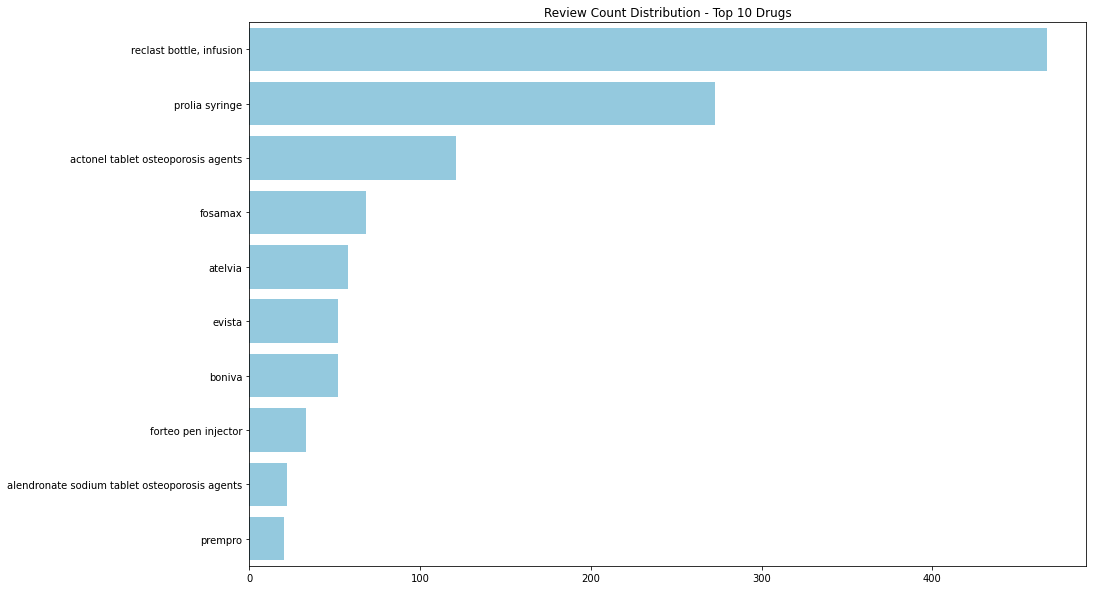

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
plt.title('Review Count Distribution - Top 10 Drugs')
sns.countplot(y = "Drug", data = df_ost, order = df_ost['Drug'].value_counts()[0:10].index, color = 'skyblue')
plt.xlabel("")
plt.ylabel("", fontsize = 20)

In [6]:
df_ost['Drug'].value_counts()[0:10]

reclast bottle, infusion                         467
prolia syringe                                   273
actonel tablet osteoporosis agents               121
fosamax                                           68
atelvia                                           58
evista                                            52
boniva                                            52
forteo pen injector                               33
alendronate sodium tablet osteoporosis agents     22
prempro                                           20
Name: Drug, dtype: int64

In [7]:
df_tmp1 = df_ost.groupby("Age")['Satisfaction'].mean().reset_index()
df_tmp2 = df_ost.groupby("Age")['EaseofUse'].mean().reset_index()
df_tmp3 = df_ost.groupby("Age")['Effectiveness'].mean().reset_index()

df_tmp1['EaseofUse'] = df_tmp2['EaseofUse']
df_tmp1['Effectiveness'] = df_tmp3['Effectiveness']
df_tmp1

,Age,Satisfaction,EaseofUse,Effectiveness
0,0-44,2.346154,3.115385,2.653846
1,45-54,2.397770,3.509294,2.486989
2,55-64,2.443223,3.439560,2.518315
3,65-74,2.341176,3.217647,2.455882
4,75+,1.961538,3.023077,2.100000
5,NA,1.700000,2.950000,2.000000


In [8]:
from matplotlib import figure

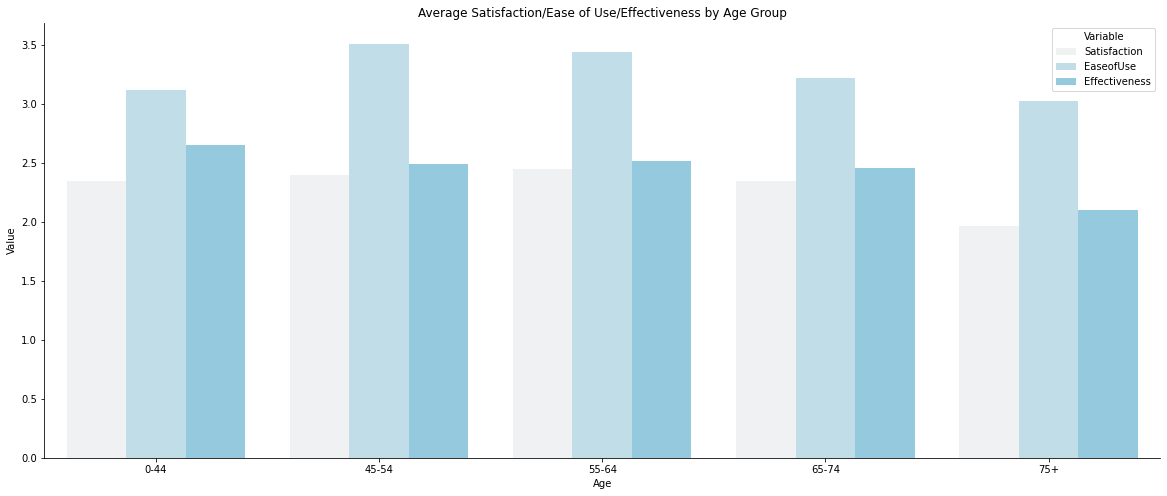

In [49]:
fig, ax1 = plt.subplots(figsize=(20, 8))
plt.title('Average Satisfaction/Ease of Use/Effectiveness by Age Group')
tidy = df_tmp1.melt(id_vars='Age').rename(columns=str.title)
sns.barplot(x='Age', y='Value', hue='Variable', data=tidy, ax=ax1, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
sns.despine(fig)

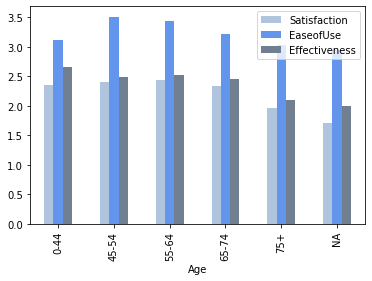

In [9]:
#fig, ax = plt.subplots()
#fig.set_size_inches(15,10)
#plt.title('Average Satisfaction/Ease of Use/Effectiveness by Age Group')
df_tmp1.plot.bar(x="Age", y=["Satisfaction", "EaseofUse", "Effectiveness"], color = ['lightsteelblue', 'cornflowerblue', 'slategrey'])
plt.rcParams['figure.figsize'] = [20, 8]

'\nplt.subplots_adjust(left=0.1,\n                    bottom=0.1, \n                    right=1.2, \n                    top=0.9, \n                    wspace=0.4, \n                    hspace=0.4)\n'

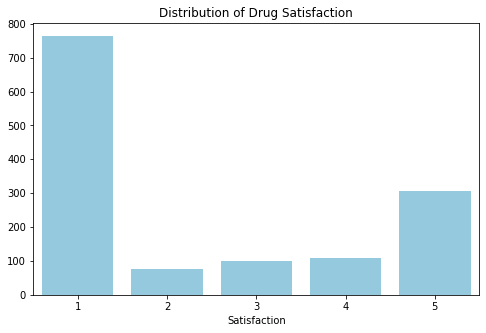

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
plt.title('Distribution of Drug Satisfaction')
sns.countplot(x="Satisfaction", color = 'skyblue', data = df_ost)
#plt.xlabel("")
plt.ylabel("")
"""
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
"""

Text(0.5, 0, '')

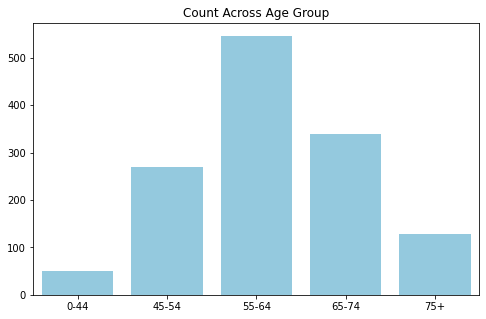

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
plt.title('Count Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["0-44", "45-54", "55-64", "65-74", "75+"])
#plt.xlabel("")
plt.ylabel("")
plt.xlabel("")

In [12]:
df_ost.groupby('Age')['Reviews'].count()

Age
0-44      52
45-54    269
55-64    546
65-74    340
75+      130
NA        20
Name: Reviews, dtype: int64

<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

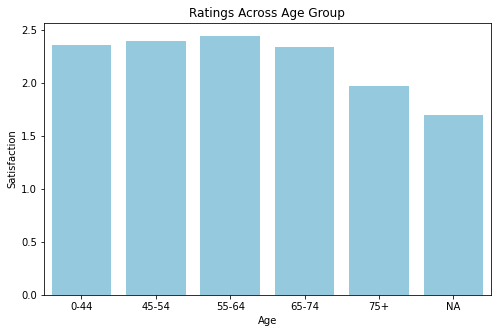

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
plt.title('Ratings Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

In [14]:
df_ost.groupby("Age")["Satisfaction"].mean().reset_index()

,Age,Satisfaction
0,0-44,2.346154
1,45-54,2.397770
2,55-64,2.443223
3,65-74,2.341176
4,75+,1.961538
5,NA,1.700000


In [15]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False).reset_index()
condition_dn

,Condition,Drug
0,Post-Menopausal Osteoporosis Prevention,42
1,Osteoporosis,35
2,Glucocorticoid-Induced Osteoporosis Prevention,9
3,Osteoporosis caused by Glucocorticoid Drugs,7
4,Osteoporosis in Male Patient,5
5,Osteoporosis in Men due to Deficient Function ...,5
6,Osteoporosis caused by Anti-Androgen Drugs,3
7,osteoporosis in postmenopausal woman at high r...,3
8,Aromatase Inhibitor Drug-Induced Osteoporosis,1


Text(0.5, 1.0, 'The number of unique drugs per condition')

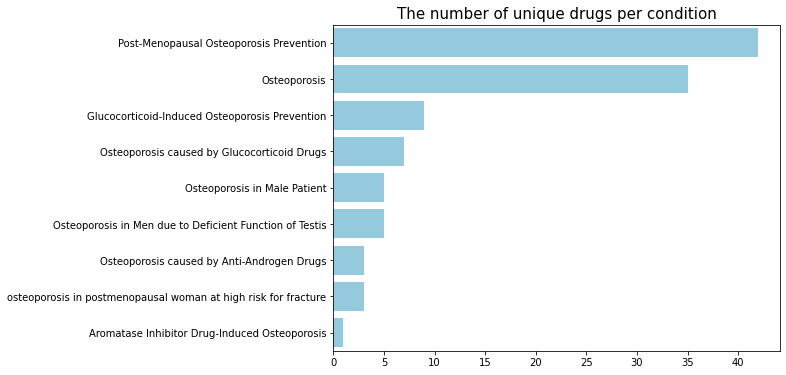

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.barplot(y = 'Condition', x = 'Drug', data = condition_dn[0:10], color='skyblue')

plt.xlabel("")
plt.ylabel("")
plt.title("The number of unique drugs per condition", fontsize=15)

#figsize = (14,6), fontsize = 10,

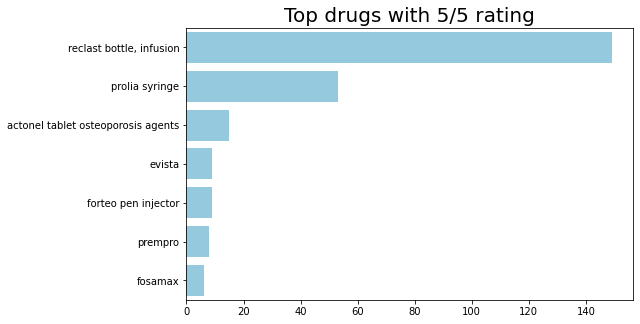

In [58]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 5, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

fig, ax = plt.subplots()
fig.set_size_inches(8,5)

sns_rating = sns.barplot(y = drugname[0:7], x = drug_rating[0:7], color = 'skyblue')
sns_rating.set_title('Top drugs with 5/5 rating', fontsize = 20)
sns_rating.set_ylabel("Number of Ratings", fontsize = 20)
sns_rating.set_xlabel("Drug Names", fontsize = 20)
plt.setp(sns_rating.get_xticklabels(), rotation=0);

plt.xlabel("")
plt.ylabel("")

_, ylabels = plt.yticks()
_, xlabels = plt.xticks()


In [18]:
print(drugname[0:7])
print('\n\n')
print(drug_rating[0:7])

['reclast bottle, infusion', 'prolia syringe', 'actonel tablet osteoporosis agents', 'evista', 'forteo pen injector', 'prempro', 'fosamax']



[149, 53, 15, 9, 9, 8, 6]


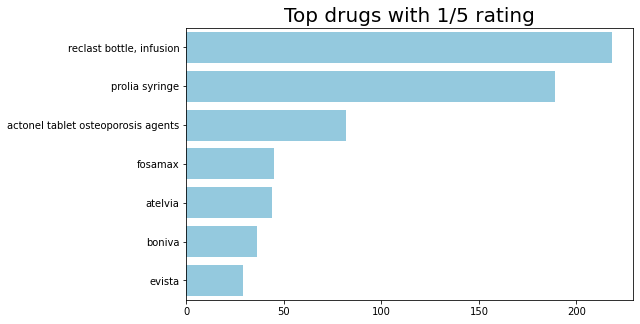

In [57]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

fig, ax = plt.subplots()
fig.set_size_inches(8,5)

sns_rating = sns.barplot(y = drugname[0:7], x = drug_rating[0:7], color = 'skyblue')
sns_rating.set_title('Top drugs with 1/5 rating', fontsize = 20)
sns_rating.set_ylabel("Number of Ratings", fontsize = 20)
sns_rating.set_xlabel("Drug Names", fontsize = 20)
plt.setp(sns_rating.get_xticklabels(), rotation=0);

plt.xlabel("")
plt.ylabel("")

_, ylabels = plt.yticks()
_, xlabels = plt.xticks()


In [20]:
print(drugname[0:7])
print('\n\n')
print(drug_rating[0:7])

['reclast bottle, infusion', 'prolia syringe', 'actonel tablet osteoporosis agents', 'fosamax', 'atelvia', 'boniva', 'evista']



[218, 189, 82, 45, 44, 36, 29]


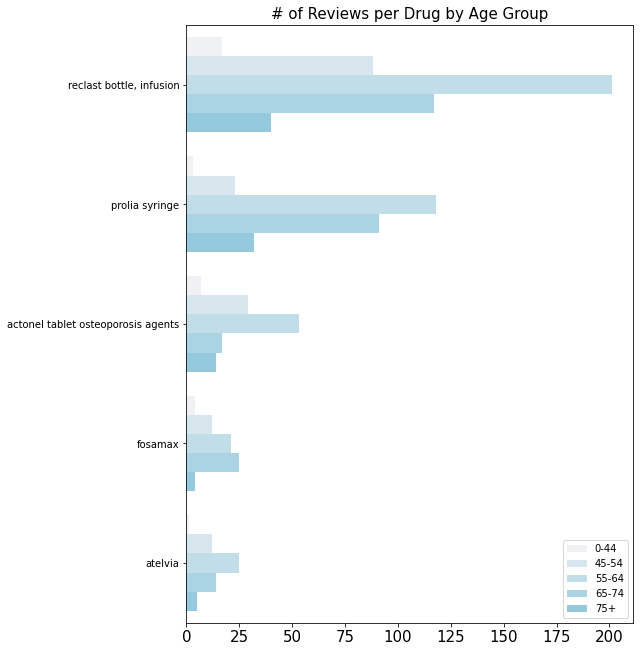

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(8,11)
plt.title('# of Reviews per Drug by Age Group', fontsize = 15)
hue_order = ['0-44', '45-54', '55-64', '65-74', '75+']
sns_count = sns.countplot(y = 'Drug', hue = 'Age', data = df_ost, order = df_ost['Drug'].value_counts()[0:5].index, color = 'skyblue', hue_order=hue_order)
plt.setp(sns_count.get_xticklabels(), rotation=0, fontsize = 15);
plt.legend()
plt.xlabel("")
plt.ylabel("")
_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
#sns.countplot(y = "Drug", data = df_ost, order = df_ost['Drug'].value_counts()[0:10].index, color = 'skyblue')

# Injectables and Non-Injectables

In [22]:
injectable_drugs = ['prolia syringe','reclast bottle, infusion','zometa vial','zoledronic acid vial', 'tymlos pen injector', 'forteo pen injector', 'pamidronate disodium vial']



infused_drugs = ['liquid calcium + vitamin d', 'oyster shell + d', 'atelvia','actonel tablet osteoporosis agents','actonel 35 mg tablet','calcium citrate 200 mg (950 mg) tablet',

       'calcium 600 mg (1,500 mg) tablet', 'calcium 600 + vitamin d',

       'calcitrate + vit d', 'citracal-vitamin d tablet',

       'citracal + d', 'citracal + d maximum', 'c calcium',

       'calcium-magnesium-zinc 333 mg-133 mg-5 mg tablet', 'vitamin d3 tablet',

 'vitamin d3', 'os-cal 500-vit d3', 'risedronate sodium', 'bio-d-mulsion forte drops', 'risedronate sodium', 'replesta',

 'duavee','viactiv', 'actical','calcitrate', 'drisdol', 'calcium 600-vit d3', 'calcium 500 + vitamin d', 'calcidol', 'esterified estrogens tablet',
 
 'etidronate disodium',  'femhrt', 'divigel gel in packet', 'climara patch, transdermal weekly', 'climara pro patch, transdermal weekly', 'estradiol', 
 
 'fyavolv', 'ibandronate sodium', 'conjugated estrogens tablet', 'evista', 'fosamax', 'junel', 'boniva', 'calcium 600 with soy', 'jinteli',
 'premarin', 'raloxifene hcl', 'vivelle-dot patch, transdermal semiweekly', 'vitamin d2 capsule', 'alendronate sodium tablet osteoporosis agents', 'alendronate sodium tablet',
  'angeliq', 'amabelz', 'activella', 'estradiol transdermal patch patch, weekly', 'estrace', 'lopreeza', 'menest', 'menostar patch, transdermal weekly', 'menostar patch, transdermal weekly', 
  'prempro', 'mimvey', 'minivelle patch, transdermal semiweekly']



In [23]:
drugs_type = []
for drugs in df_ost['Drug']:
    if drugs in injectable_drugs:
        drugs_type.append("injectable")
    elif drugs in infused_drugs:
        drugs_type.append("non_injectable")
    else:
        drugs_type.append("")

df_ost["Drug_Type"] = drugs_type

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_31084\3844266986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ost["Drug_Type"] = drugs_type


In [24]:
lst=['lotensin', 'mepron', "men's potent formula"]

df_ost = df_ost[df_ost.Drug.isin(lst) == False]

Text(0, 0.5, '')

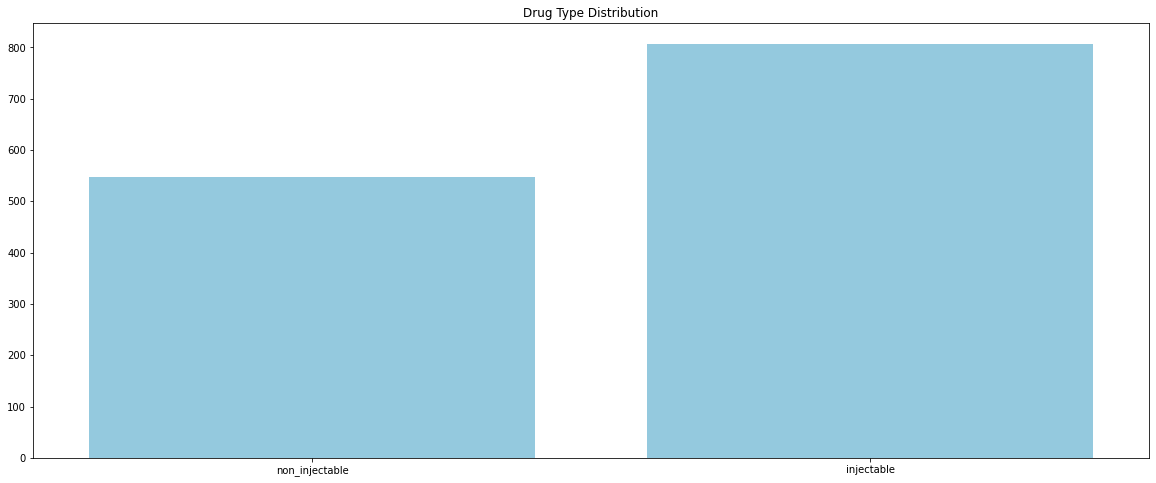

In [25]:
#fig, ax = plt.subplots()
fig.set_size_inches(10,15)
plt.title('Drug Type Distribution')
sns.countplot(x = 'Drug_Type', data = df_ost, color = 'skyblue')
plt.xlabel("")
plt.ylabel("")

Text(0.5, 0, '')

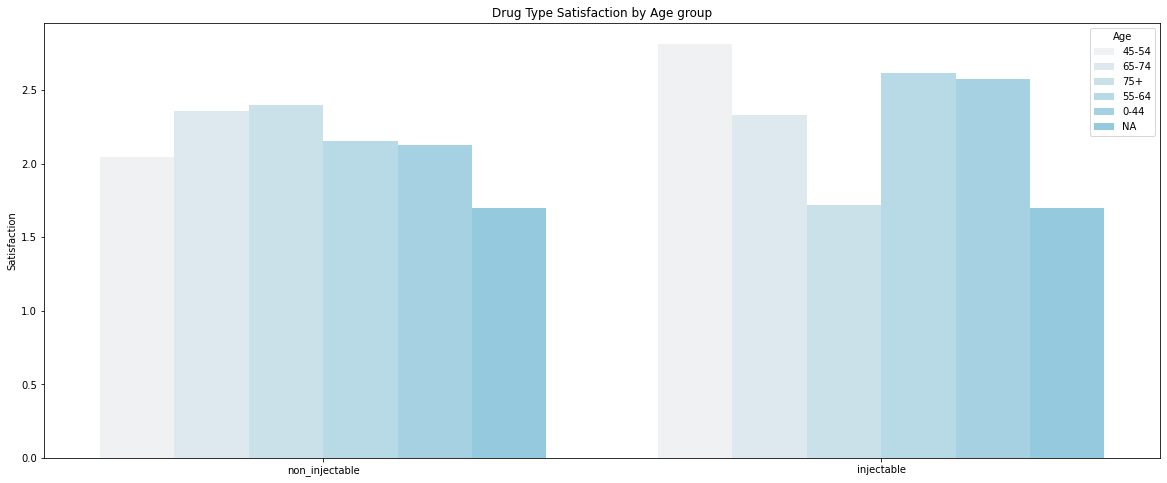

In [26]:
#fig, ax = plt.subplots()
#fig.set_size_inches(10,15)
plt.title('Drug Type Satisfaction by Age group')
sns.barplot(x='Drug_Type', y = 'Satisfaction', hue = 'Age', data = df_ost, color = 'skyblue', ci=None)
plt.rcParams['figure.figsize'] = [12, 15]
plt.xlabel("")

In [27]:
#Satisfaction of drugs over the years
df_ost['Year'] = df_ost['Date'].dt.year
df_tmp = df_ost.groupby('Year')['Satisfaction'].agg(count='size', mean='mean').reset_index()
#df_ost.groupby(["Year"])["Satisfaction"].agg(count='size', mean='mean').reset_index()

(0.0, 6.0)

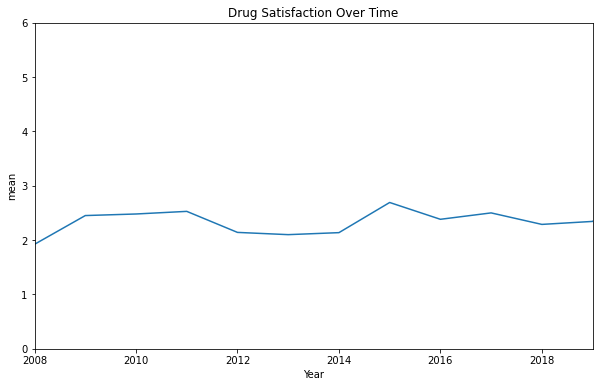

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Drug Satisfaction Over Time')
sns.lineplot(x = 'Year', y = 'mean', data=df_tmp, ax=ax)
ax.set_xlim(2008, 2019)
ax.set_ylim(0, 6)